In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import requests
from PIL import Image
from io import BytesIO

Photo URL for Kevin De Bruyne: https://www.thesportsdb.com/images/media/player/thumb/yibqv71676043512.jpg
Photo URL for Cole Palmer: https://www.thesportsdb.com/images/media/player/thumb/iocz4d1724686397.jpg
Photo URL for Bukayo Saka: https://www.thesportsdb.com/images/media/player/thumb/5phdhi1724686822.jpg
Photo URL for Phil Foden: https://www.thesportsdb.com/images/media/player/thumb/2crwul1702564715.jpg


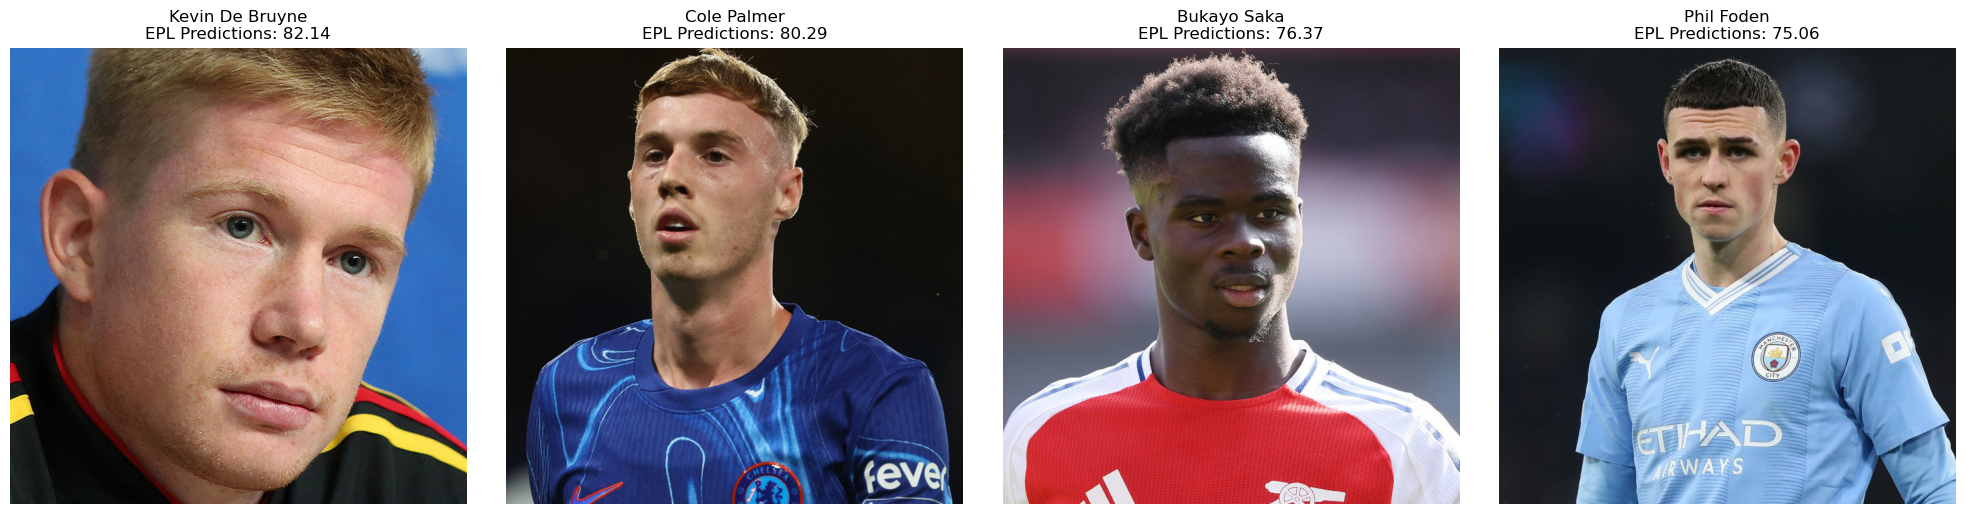

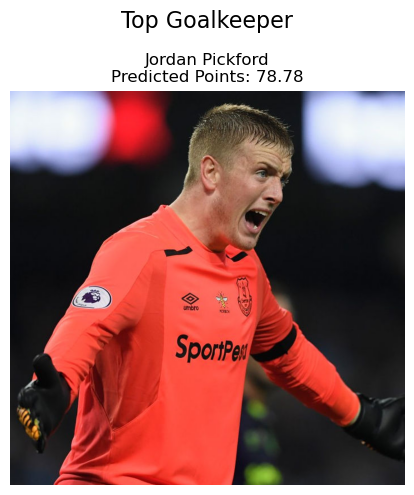

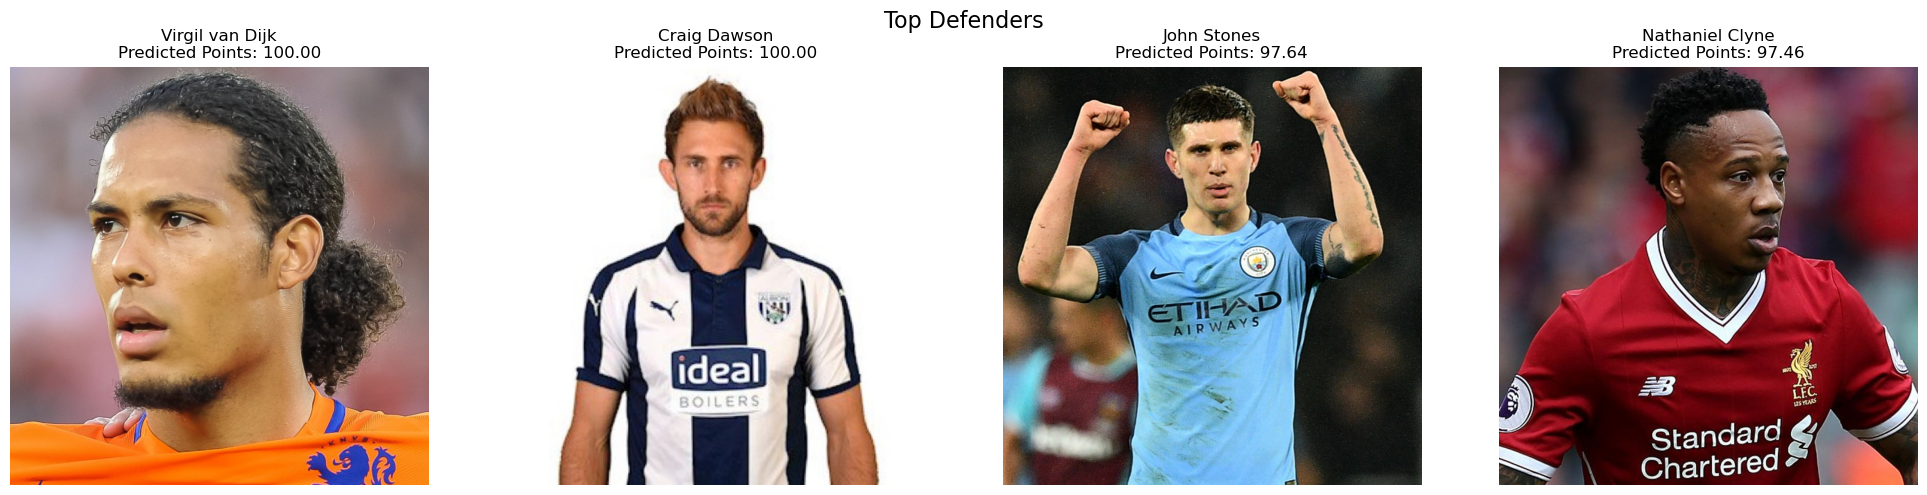

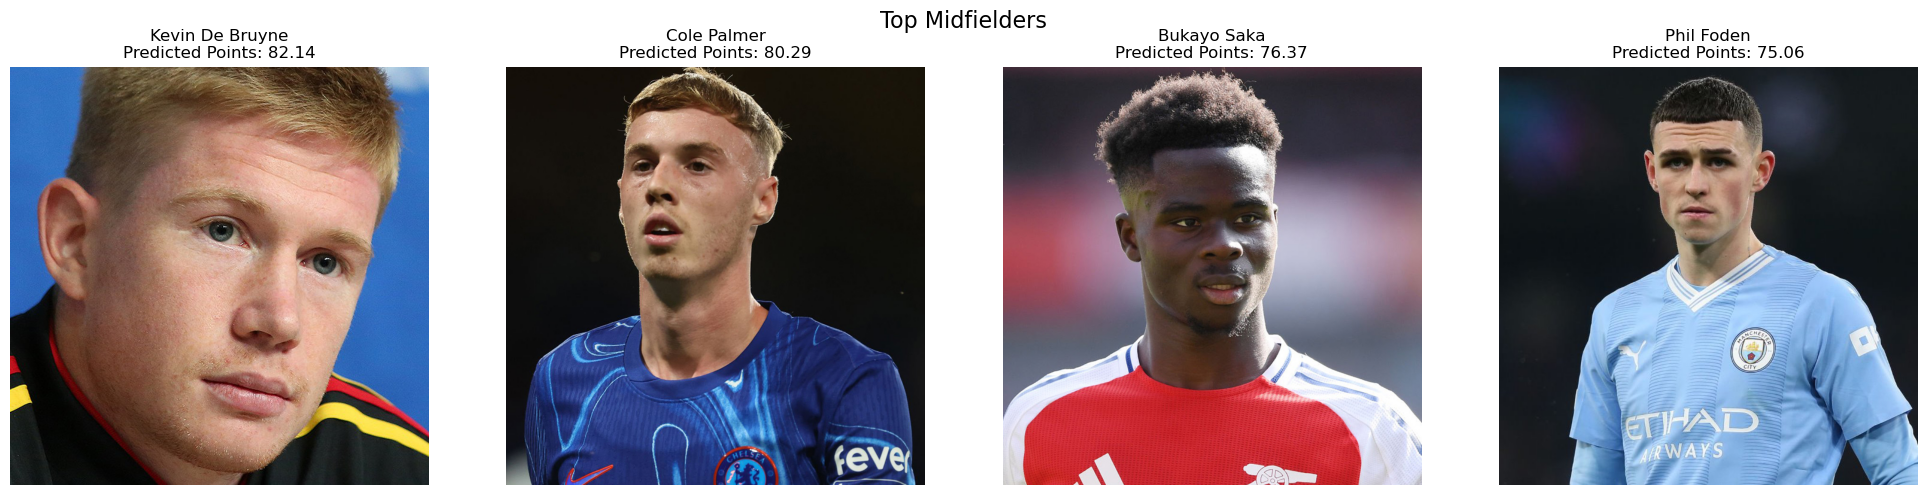

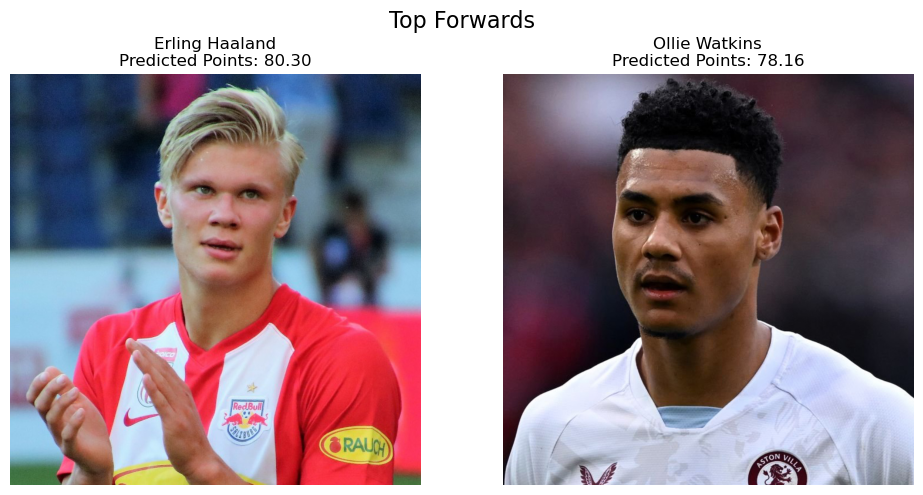

In [16]:
#plot the players picture
# Define the base URL for player photos
photo_base_url = "https://resources.premierleague.com/premierleague/photos/players/110x140/p"

goalies_df = pd.read_csv('../data/predictions/weighted_bor3_goalkeepers.csv')
defenders_df = pd.read_csv('../data/predictions/weighted_bor3_defenders.csv')
midfielders_df = pd.read_csv('../data/predictions/weighted_bor3_midfielders.csv')
forwards_df = pd.read_csv('../data/predictions/weighted_bor3_forwards.csv')


# Function to get the full photo URL for a player
def get_photo_url(photo_id):
    return f"{photo_base_url}{photo_id}.png"

# Sort midfielders by EPL_PREDICTIONS and select the top 4
top_goalies = goalies_df.sort_values(by='Predicted_Points', ascending=False).head(1)
top_midfielders = midfielders_df.sort_values(by='Predicted_Points', ascending=False).head(4)
top_defenders = defenders_df.sort_values(by='Predicted_Points', ascending=False).head(4)
top_forwards = forwards_df.sort_values(by='Predicted_Points', ascending=False).head(2)

def get_player_image_url(player_name):
    base_url = "https://www.thesportsdb.com/api/v1/json/3/searchplayers.php"
    response = requests.get(f"{base_url}?p={player_name}")
    data = response.json()
    if data['player'] and len(data['player']) > 0:
        return data['player'][0]['strThumb']
    return None

# Plot the picture of the top 4 midfielders
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, (_, player) in zip(axes, top_midfielders.iterrows()):
    player_name = f"{player['First_Name']} {player['Last_Name']}"
    epl_predictions = player['Predicted_Points']
    
    # Get the photo URL
    photo_url = get_player_image_url(player_name)
    print(f"Photo URL for {player_name}: {photo_url}")  # Debug print statement
    
    if photo_url:
        try:
            # Fetch and display the image
            response = requests.get(photo_url)
            response.raise_for_status()
            img = Image.open(BytesIO(response.content))
            
            # Display the image with the player's name and EPL predictions
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{player_name}\nEPL Predictions: {epl_predictions:.2f}")
            
        except Exception as e:
            print(f"Error loading image for {player_name}: {e}")
            ax.axis('off')
            ax.text(0.5, 0.5, f"{player_name}\nEPL Predictions: {epl_predictions:.2f}\n(Image not available)",
                    ha='center', va='center', wrap=True)
    else:
        ax.axis('off')
        ax.text(0.5, 0.5, f"{player_name}\nEPL Predictions: {epl_predictions:.2f}\n(Image not available)",
                ha='center', va='center', wrap=True)

plt.tight_layout()
plt.show()


# Function to plot players for a given position
def plot_players(df, num_players, title):
    fig, axes = plt.subplots(1, num_players, figsize=(5*num_players, 5))
    if num_players == 1:
        axes = [axes]  # Wrap single Axes object in a list for consistent iteration
    
    for ax, (_, player) in zip(axes, df.head(num_players).iterrows()):
        player_name = f"{player['First_Name']} {player['Last_Name']}"
        predicted_points = player['Predicted_Points']
        
        photo_url = get_player_image_url(player_name)
        
        if photo_url:
            try:
                response = requests.get(photo_url)
                response.raise_for_status()
                img = Image.open(BytesIO(response.content))
                ax.imshow(img)
            except Exception as e:
                print(f"Error loading image for {player_name}: {e}")
                ax.text(0.5, 0.5, "Image not available", ha='center', va='center')
        else:
            ax.text(0.5, 0.5, "Image not available", ha='center', va='center')
        
        ax.axis('off')
        ax.set_title(f"{player_name}\nPredicted Points: {predicted_points:.2f}")
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot players for each position
plot_players(top_goalies, 1, "Top Goalkeeper")
plot_players(top_defenders, 4, "Top Defenders")
plot_players(top_midfielders, 4, "Top Midfielders")
plot_players(top_forwards, 2, "Top Forwards")


Photo URL for Jordan Pickford: https://www.thesportsdb.com/images/media/player/thumb/lloaw31510332448.jpg
Photo URL for Virgil van Dijk: https://www.thesportsdb.com/images/media/player/thumb/9fe0tn1720452118.jpg
Photo URL for Craig Dawson: https://www.thesportsdb.com/images/media/player/thumb/1efiw61545244470.jpg
Photo URL for John Stones: https://www.thesportsdb.com/images/media/player/thumb/og2ie61510521739.jpg
Photo URL for Nathaniel Clyne: https://www.thesportsdb.com/images/media/player/thumb/sig5lh1509999736.jpg
Photo URL for Kevin De Bruyne: https://www.thesportsdb.com/images/media/player/thumb/yibqv71676043512.jpg
Photo URL for Cole Palmer: https://www.thesportsdb.com/images/media/player/thumb/iocz4d1724686397.jpg
Photo URL for Bukayo Saka: https://www.thesportsdb.com/images/media/player/thumb/5phdhi1724686822.jpg
Photo URL for Phil Foden: https://www.thesportsdb.com/images/media/player/thumb/2crwul1702564715.jpg
Photo URL for Erling Haaland: https://www.thesportsdb.com/images/m

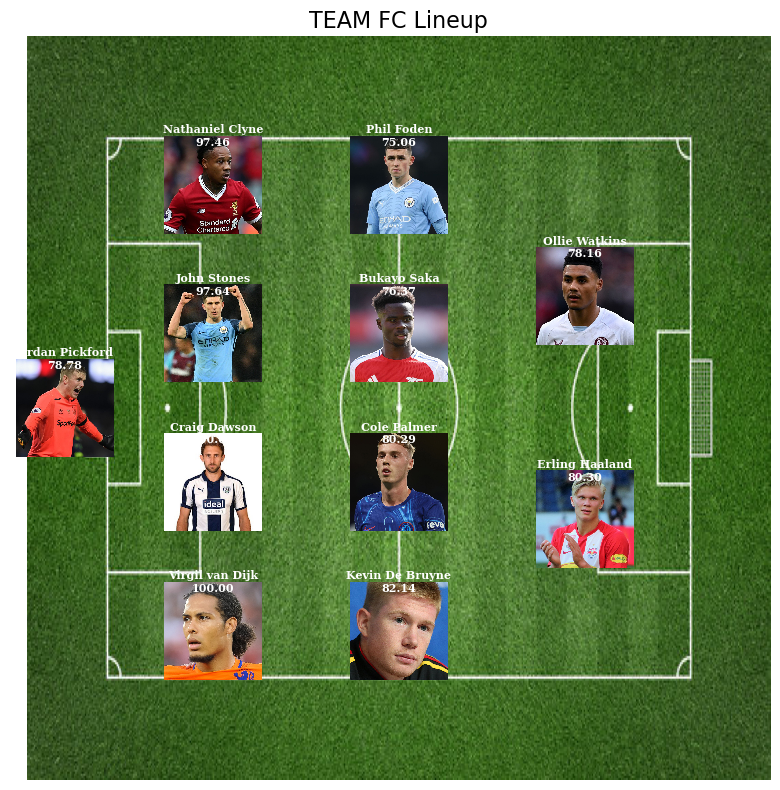

In [24]:
# Plot the players on an actual pitch with their pictures in a 4-4-2 formation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO

def add_player_image(ax, x, y, player_name, predicted_points):
    photo_url = get_player_image_url(player_name)
    print(f"Photo URL for {player_name}: {photo_url}")  # Debug print statement
    if photo_url:
        try:
            response = requests.get(photo_url)
            response.raise_for_status()
            img = Image.open(BytesIO(response.content)).convert('RGBA')
            imagebox = OffsetImage(img, zoom=0.1)
            ab = AnnotationBbox(imagebox, (x, y), frameon=False)
            ax.add_artist(ab)
            ax.text(x, y+0.05, f"{player_name}\n{predicted_points:.2f}", ha='center', va='bottom', fontsize=8, 
                    fontweight='bold', fontfamily='serif', color='white')
        except Exception as e:
            print(f"Error loading image for {player_name}: {e}")
            ax.text(x, y, f"{player_name}\n{predicted_points:.2f}", ha='center', va='center', fontsize=8)
    else:
        ax.text(x, y, f"{player_name}\n{predicted_points:.2f}", ha='center', va='center', fontsize=8)

# Load and display the pitch image
pitch_img = mpimg.imread('../results/figures/pitch.jpg')  # Replace with actual path to a soccer pitch image
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(pitch_img, extent=[0, 1, 0, 1])

# Plot the goalkeeper
gk = top_goalies.iloc[0]
add_player_image(ax, 0.05, 0.5, f"{gk['First_Name']} {gk['Last_Name']}", gk['Predicted_Points'])

# Plot the defenders
defender_y = [0.2, 0.4, 0.6, 0.8]
for i, (_, player) in enumerate(top_defenders.head(4).iterrows()):
    add_player_image(ax, 0.25, defender_y[i], f"{player['First_Name']} {player['Last_Name']}", player['Predicted_Points'])

# Plot the midfielders
midfielder_y = [0.2, 0.4, 0.6, 0.8]
for i, (_, player) in enumerate(top_midfielders.head(4).iterrows()):
    add_player_image(ax, 0.5, midfielder_y[i], f"{player['First_Name']} {player['Last_Name']}", player['Predicted_Points'])

# Plot the forwards
forward_y = [0.35, 0.65]
for i, (_, player) in enumerate(top_forwards.head(2).iterrows()):
    add_player_image(ax, 0.75, forward_y[i], f"{player['First_Name']} {player['Last_Name']}", player['Predicted_Points'])

ax.axis('off')
plt.title("TEAM FC Lineup", fontsize=16)
plt.tight_layout()
plt.show()
